In [1]:
## generate pole separation across years
#creed2_/GSS/Qnets
import os
import matplotlib.pyplot as plt
import collections
import seaborn as sns 
import pandas as pd
import numpy as np
from cognet.cognet import cognet as cg
from cognet.dataFormatter import dataFormatter
from cognet.model import model 

# get years 
features_by_year = pd.read_csv('examples_data/features_by_year_GSS.csv',
                               keep_default_na=True, 
                               index_col=False)
POLEFILE='examples_data/polar_vectors.csv'
qnets_by_year = {x[-11:-7]: x for x in os.listdir('../../creed2_/GSS/Qnets/')}
data_by_year = {x[4:8]: x for x in os.listdir('../../creed2_/GSS/data/processed_data')}
polarDist_by_year = {}

In [2]:
for year, qnet in qnets_by_year.items():
    qnet = '../../creed2_/GSS/Qnets/' + qnet
    data_obj=dataFormatter('../../creed2_/GSS/data/processed_data/'+data_by_year[year])
    model_obj = model()
    model_obj.load(qnet)
    cognet_obj = cg()
    cognet_obj.load_from_model(model_obj, data_obj, 'all')

    # produce stats on how many column names actually match
    stats = cognet_obj.set_poles(POLEFILE,"R","L",steps=120)

    # compute polar distance matrix
    dmatrix = cognet_obj.polar_separation(nsteps=0)
    polarDist_by_year[year]=dmatrix[0][1]
polarDist_by_year

updating
13 pole features not found in sample features
updating
17 pole features not found in sample features
updating
11 pole features not found in sample features
updating
19 pole features not found in sample features
updating
4 pole features not found in sample features
updating
26 pole features not found in sample features
updating
29 pole features not found in sample features
updating
13 pole features not found in sample features
updating
12 pole features not found in sample features
updating
13 pole features not found in sample features
updating
10 pole features not found in sample features
updating
18 pole features not found in sample features
updating
19 pole features not found in sample features
updating
9 pole features not found in sample features
updating
23 pole features not found in sample features
updating
28 pole features not found in sample features
updating
12 pole features not found in sample features
updating
13 pole features not found in sample features
updating
0 p

{'1989': 0.028666814537318012,
 '1985': 0.03411295889677604,
 '2006': 0.016904539879532627,
 '1977': 0.053331064850174255,
 '2018': 0.03291744722724784,
 '1983': 0.01751297346187136,
 '1972': 0.03655227900166918,
 '1988': 0.03215295078751239,
 '2004': 0.013893357861687987,
 '2002': 0.014969646755538123,
 '2010': 0.031198108265804502,
 '1982': 0.04521168265918178,
 '1976': 0.04576085494124103,
 '2016': 0.03289166281269663,
 '1973': 0.05706279698614031,
 '1978': 0.024967766403796138,
 '1996': 0.01667469548753219,
 '1990': 0.026615269788044304,
 '2008': 0.030638640216348486,
 '2012': 0.03001906887055811,
 '1987': 0.03584595482288138,
 '1993': 0.0314343394696634,
 '1991': 0.02731887389560888,
 '1984': 0.04218896338804029,
 '2000': 0.015484248871896268,
 '1975': 0.02871663384857438,
 '1998': 0.026917453791723,
 '2014': 0.027777536050700075,
 '1986': 0.008699365568925753,
 '1974': 0.05564955589480665,
 '1994': 0.01895786140551179,
 '1980': 0.04424879201595486}

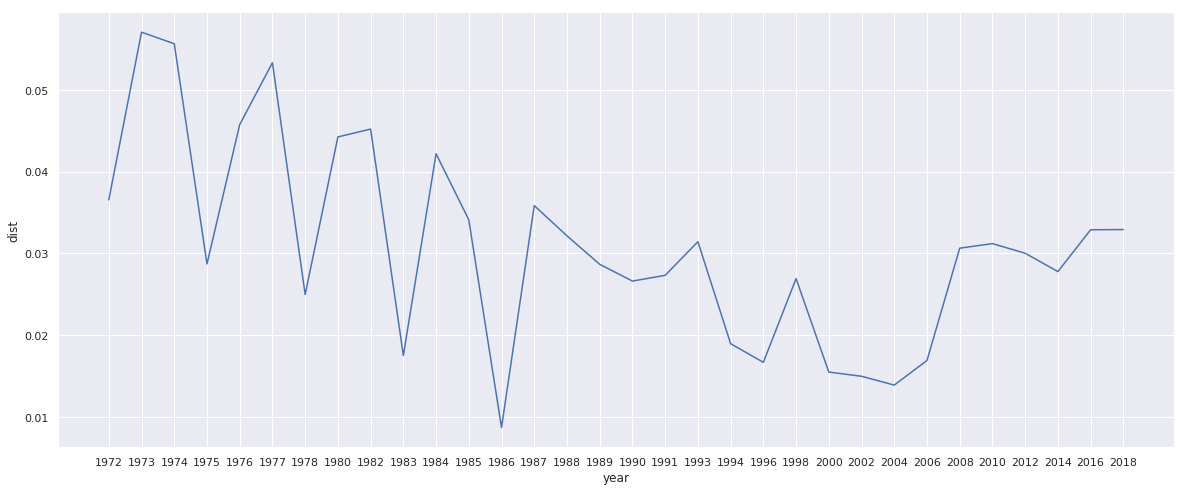

In [3]:
sorted_dist = collections.OrderedDict(sorted(polarDist_by_year.items()))
df = pd.DataFrame.from_dict(sorted_dist, orient='index')
df.reset_index(level=0, inplace=True)
df.columns = ['year', 'dist']

sns.set(style='darkgrid', rc={'figure.figsize':(20, 8)})
sns.lineplot(x='year', y='dist', data=df)
    
# year = list(sorted_dist.keys())
# dist = list(sorted_dist.values())     
# plt.plot(year, dist)
# plt.show